<a href="https://colab.research.google.com/github/aqillabf/Data-Scientist/blob/main/Recency_Frequency_Monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install yellowbrick

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the dataset
data = pd.read_csv("data.csv",encoding="ISO-8859-1")
#karakter internasional yang mungkin tidak tercakup oleh encoding standar seperti UTF-8

In [ ]:
#5 data teratas
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

#### Penjelasan
pada tabel di atas terdapat output 5 data teratas dari dataset yang digunakan,
karena pada perintah sebelumnya menginginkan output terdapat 5 tabel teratas.

In [ ]:
#5 data terbawah
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


#### Penjelasan
pada tabel di atas terdapat output 5 data terbawah dari dataset yang digunakan,
karena pada perintah sebelumnya menginginkan output terdapat 5 tabel terbawah.

In [ ]:
#5 data sample
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
182975,552638,23298,SPOTTY BUNTING,6,5/10/2011 13:00,4.95,17700.0,United Kingdom
177502,552108,20727,LUNCH BAG BLACK SKULL.,5,5/6/2011 11:36,1.65,17841.0,United Kingdom
213373,555537,21713,CITRONELLA CANDLE FLOWERPOT,3,6/5/2011 12:37,2.10,15453.0,United Kingdom
258805,559672,21901,"KEY FOB , BACK DOOR",3,7/11/2011 14:04,0.65,14796.0,United Kingdom
8531,537137,22151,PLACE SETTING WHITE HEART,24,12/5/2010 12:43,0.42,16327.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Penjelasan
data di atas menunjukkan berbagai macam data type yg ada pada dataset tersebut.
Menampilkan output yang terdapat missing values pada kolom dataset,
terdapat missing values pada kolom 2 Description dengan code 540455 serta pada kolom 7 CustomerID dengan code 406829
dimana kedua kode pada kolom tersebut memiliki kode yang berbeda dengan kode lainnya yg terdapat pada kolom-kolom yg ada,
sedemikian hingga dapat dikatakan bahwa untuk kolom Description dan CustomerID merupakan missing values.

In [ ]:
# Create a new variable OrderValue = Quanity * UnitPrice
data["OrderValue"] = data["Quantity"] * data["UnitPrice"]
data[["Quantity", "UnitPrice", "OrderValue"]]

,Quantity,UnitPrice,OrderValue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
541904,12,0.85,10.20
541905,6,2.10,12.60
541906,4,4.15,16.60
541907,4,4.15,16.60


kode tersebut untuk menghitung nilai "OrderValue" berdasarkan hasil perkalian antara nilai dalam kolom "Quantity" dan "UnitPrice" dalam DataFrame data. Kemudian, lima baris pertama dan terakhir dari kolom-kolom terkait ditampilkan untuk memberikan gambaran awal tentang bagaimana kolom-kolom tersebut terkait satu sama lain setelah operasi matematika dilakukan. Hal ini bisa bermanfaat dalam analisis data dan pemahaman lebih lanjut tentang nilai transaksi atau pesanan dalam dataset yang sedang ditangani.

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   OrderValue   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


#### Penjelasan
output di atas menampilkan variabel baru yaitu Order Value,
dengan rumus banyaknya barang (Quantity) dikali dengan harga satuan dari barang tersebut.
Serta menampilkan tabel quantity, unit price, dan order value.

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,OrderValue
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
#describe untuk data kategorikal, apakah bisa ?
data[['Description','Country','InvoiceDate','OrderValue']].describe()

,OrderValue
count,541909.000000
mean,17.987795
std,378.810824
min,-168469.600000
25%,3.400000
50%,9.750000
75%,17.400000
max,168469.600000


#### Penjelasan
output di atas menampilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
describe() membantu mendapatkan gambaran umum singkat tentang kumpulan data.

In [ ]:
#copy data ke variabel df
df = data.copy()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   OrderValue   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


- Ada 541909 baris dan 8 kolom.
- Tampaknya ada nilai yang hilang (missing value) pada kolom 'Description' dan 'CustomerId'.
- Semua tipe data BAIK!

Data Dictionary

- InvoiceNo: Nomor faktur. Nominal, nomor integral 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'c', ini menunjukkan pembatalan.
- StockCode: Kode produk (item). Nominal, nomor integral 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda.
- Deskripsi: Nama produk (item). Nominal.
- Kuantitas: Jumlah setiap produk (item) per transaksi. Numerik.
- InvoiceDate: Tanggal dan waktu Invice. Numerik, hari dan waktu ketika setiap transaksi

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   OrderValue   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


# **Exploratory Data Analysis (EDA)**

In [ ]:
nums = df.select_dtypes(exclude = 'object')
cats = df.select_dtypes(include = 'object')
datetime = df.select_dtypes(include = 'datetime')

In [ ]:
nums

,Quantity,UnitPrice,CustomerID,OrderValue
0,6,2.55,17850.0,15.30
1,6,3.39,17850.0,20.34
2,8,2.75,17850.0,22.00
3,6,3.39,17850.0,20.34
4,6,3.39,17850.0,20.34
...,...,...,...,...
541904,12,0.85,12680.0,10.20
541905,6,2.10,12680.0,12.60
541906,4,4.15,12680.0,16.60
541907,4,4.15,12680.0,16.60


In [ ]:
nums.describe()

,Quantity,UnitPrice,CustomerID,OrderValue
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
cats.describe()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


- Produk "WHITE HANGING HEART T-LIGHT HOLDER" adalah produk yang paling banyak dibeli oleh pelanggan.
- Sebagian besar pelanggan dari Inggris (UK).

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.Description.value_counts().head(20)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


### Univariate Analysis
- Analisis Suatu Distribusi pada satu kolom tertentu saja

In [ ]:
top = df['Description'].value_counts().head(20)
top

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


In [ ]:
#Making function to visualize top 20 products and top 5 countries
def plot(df, column_name, n=20): #default n = 20, we can customize it.
    top = df[column_name].value_counts().head(n)
    ax = top.plot(kind='barh', figsize=(8, 6))
    plt.grid(False)

    # Adding value on each bar
    for i, v in enumerate(top):
        ax.text(v, i, str(v), ha='left', va='center')

Text(0.5, 1.0, 'Top 20 Product with The Highest Buying')

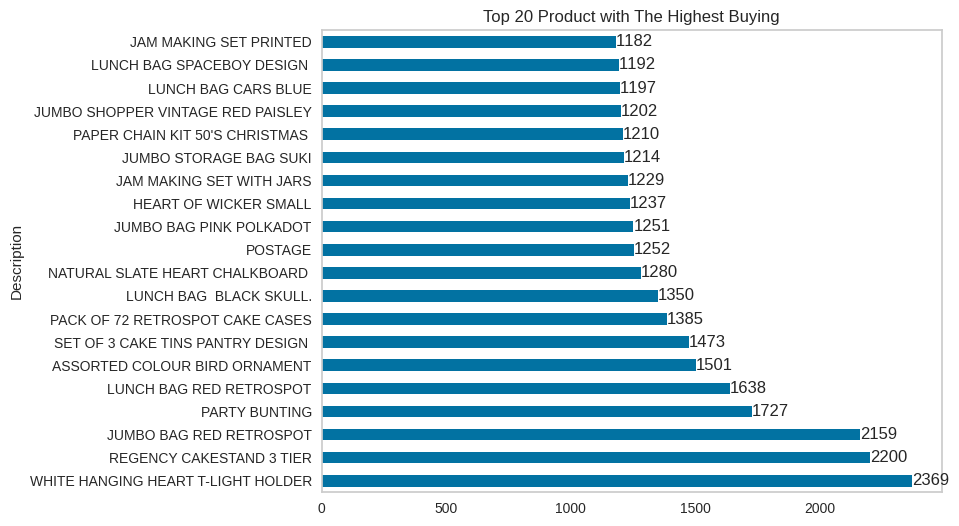

In [ ]:
#Showing top 20 of products
plot(df, 'Description', n=20)
plt.title("Top 20 Product with The Highest Buying")

Kode yang diberikan adalah sebuah fungsi Python yang bertujuan untuk memvisualisasikan 20 produk teratas berdasarkan kolom 'Description' dari DataFrame df. Fungsi ini menggunakan diagram batang horizontal untuk menampilkan informasi teratas, dengan setiap bar yang menunjukkan jumlah kemunculan setiap produk dalam data. output nya berupa produk mana yang paling sering muncul dalam data, sehingga memberikan gambaran visual tentang popularitas atau frekuensi pembelian setiap produk. Dengan demikian, output tersebut akan memberikan informasi yang berguna untuk analisis produk dan kecenderungan pembelian dalam dataset yang sedang ditangani.

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


## showing top 5 country with the highest customers

In [ ]:
df.Country.value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


Text(0.5, 1.0, 'Top 5 Countries with The Highest Customers')

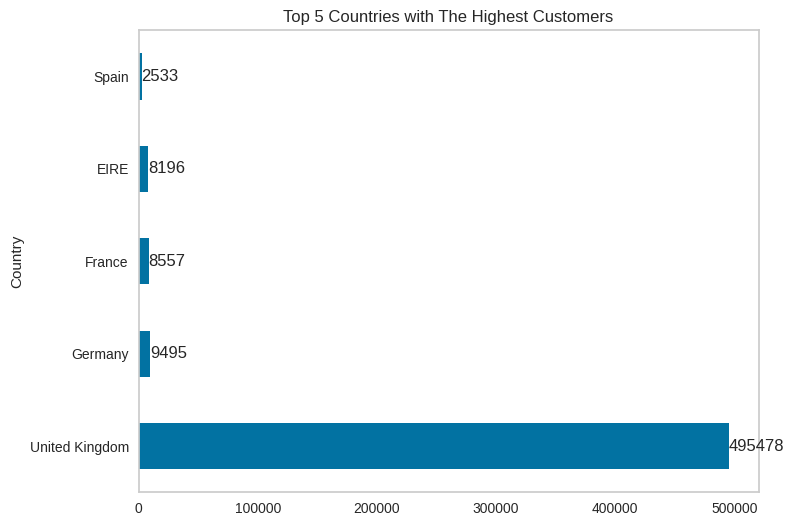

In [ ]:
#showing top 5 country with the highest customers
plot(df, 'Country', n=5)
plt.title("Top 5 Countries with The Highest Customers")

In [ ]:
df_united_kingdom = df[df['Country']=='United Kingdom']
df_united_kingdom

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,214.80


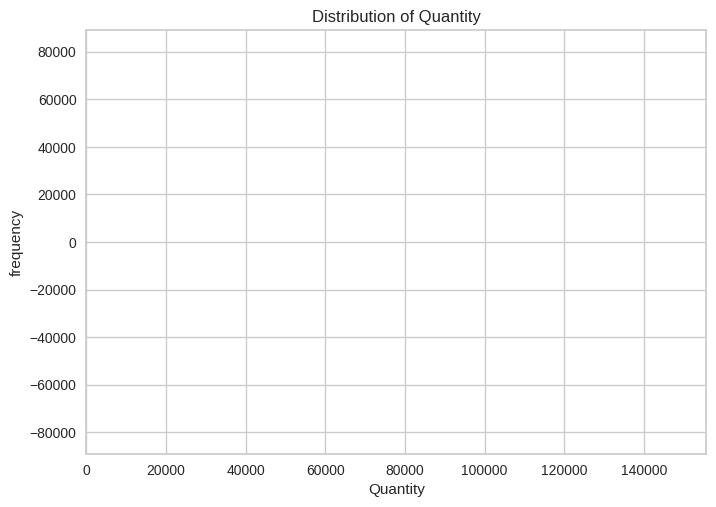

In [ ]:
sns.histplot(data=df, y="Quantity")
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('frequency')
plt.show()

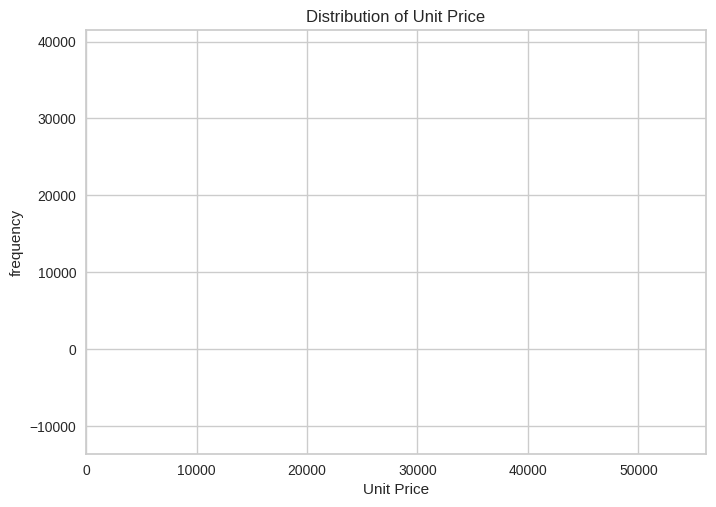

In [ ]:
sns.histplot(data=df, y="UnitPrice")
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('frequency')
plt.show()

### Bivariate Analysis
- Analisis berdasarkan keterkaitan antar 2 kolom pada dataset, biasanya melakukan suatu aggregasi (Sum, count, max, min, dsb)

DataFrame ini akan menampilkan produk-produk yang paling sering terjual dalam dataset yang sedang diproses. Outputnya akan berupa tabel yang mencakup nama produk (dalam kolom 'Description') dan jumlah transaksi yang terkait dengan masing-masing produk (dalam kolom 'Transaction').

### identifikasi 10 produk teratas berdasarkan jumlah transaksi terkait dengan masing-masing produk

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.groupby('Description').agg(Transaction=('InvoiceNo', 'count')).reset_index().sort_values('Transaction', ascending=False).head(10)

,Description,Transaction
3918,WHITE HANGING HEART T-LIGHT HOLDER,2369
2915,REGENCY CAKESTAND 3 TIER,2200
1866,JUMBO BAG RED RETROSPOT,2159
2471,PARTY BUNTING,1727
2054,LUNCH BAG RED RETROSPOT,1638
244,ASSORTED COLOUR BIRD ORNAMENT,1501
3195,SET OF 3 CAKE TINS PANTRY DESIGN,1473
2395,PACK OF 72 RETROSPOT CAKE CASES,1385
2046,LUNCH BAG BLACK SKULL.,1350
2253,NATURAL SLATE HEART CHALKBOARD,1280


In [ ]:
top10_product = (df
                 .groupby('Description')
                 .agg(Transaction=('InvoiceNo', 'count'))
                 .reset_index().sort_values('Transaction', ascending=False)
                 .head(10)
                 )
top10_product

,Description,Transaction
3918,WHITE HANGING HEART T-LIGHT HOLDER,2369
2915,REGENCY CAKESTAND 3 TIER,2200
1866,JUMBO BAG RED RETROSPOT,2159
2471,PARTY BUNTING,1727
2054,LUNCH BAG RED RETROSPOT,1638
244,ASSORTED COLOUR BIRD ORNAMENT,1501
3195,SET OF 3 CAKE TINS PANTRY DESIGN,1473
2395,PACK OF 72 RETROSPOT CAKE CASES,1385
2046,LUNCH BAG BLACK SKULL.,1350
2253,NATURAL SLATE HEART CHALKBOARD,1280


output yang dihasilkan berupa identifikasi 10 produk teratas berdasarkan jumlah transaksi terkait dengan masing-masing produk.

produk-produk ini telah diurutkan berdasarkan jumlah transaksi secara menurun, sehingga produk dengan jumlah transaksi tertinggi muncul di bagian atas. Output ini memberikan informasi yang berguna dalam menganalisis produk yang paling diminati atau sering terjual dalam dataset yang sedang diproses.

<ipython-input-41-b16e2d6c6d34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_product, x='Description', y='Transaction', palette="viridis")


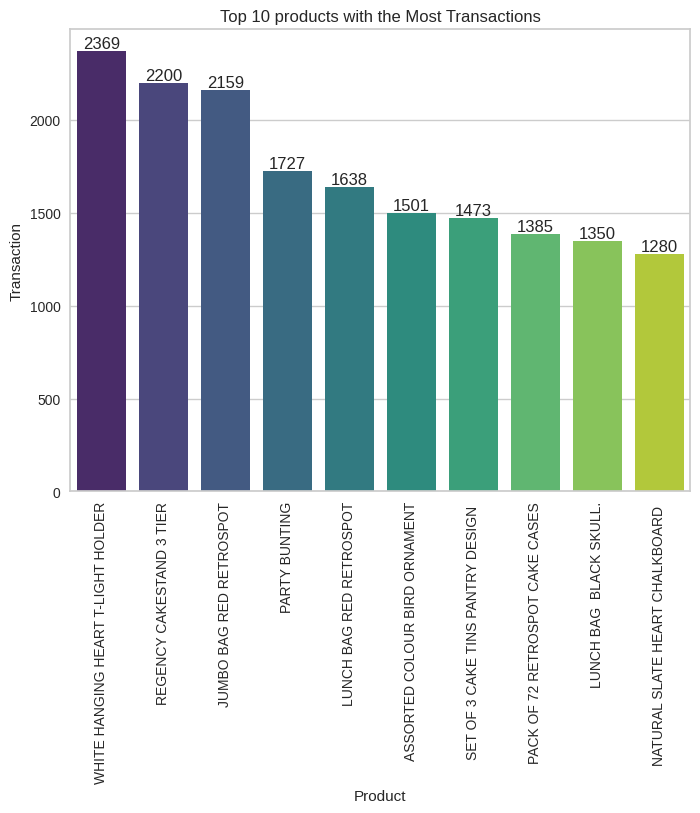

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top10_product, x='Description', y='Transaction', palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.title("Top 10 products with the Most Transactions")

# Adding value on each bar
for i, v in enumerate(top10_product['Transaction']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

kode perintah di atas untuk membuat visualisasi
menggunakan Seaborn, yang merupakan pustaka Python
untuk membuat grafik statistik.

Dengan demikian, keseluruhan kode berfungsi
untuk membuat visualisasi yang jelas dan informatif
dari 10 produk teratas berdasarkan jumlah transaksi
yang terkait dengan masing-masing produk.

Visualisasi ini membantu dengan jelas memahami
perbandingan antara produk-produk ini
dalam hal popularitas dan frekuensi penjualan.

#### 10 produk teratas dengan transaksi paling sedikit

In [ ]:
low10_product = (df
                 .groupby('Description')
                 .agg(Transaction=('InvoiceNo', 'count'))
                 .reset_index().sort_values('Transaction', ascending=True)
                 .head(10)
                 )
low10_product

,Description,Transaction
4222,wrongly sold sets,1
2554,PINK BERTIE MOBILE PHONE CHARM,1
1375,"FOOD COVER WITH BEADS , SET 2 SIZES",1
2551,PINK BAROQUE FLOCK CANDLE HOLDER,1
352,BIG POLKADOT MUG,1
1380,FOUND,1
2546,PINK ALLIUM ARTIFICIAL FLOWER,1
2545,PINK ACRYLIC JEWEL SNOWFLAKE,1
2504,PEG BAG APPLE DESIGN,1
344,BELL HEART ANTIQUE GOLD,1


Karena semua produk di atas memiliki nilai transaksi yang sama, sehingga tidak menarik untuk divisualisasikan.

#### 10 pelanggan teratas dengan pengeluaran uang terbanyak

In [ ]:
#Create total_price column
df['total_price'] = df['Quantity'] * df['UnitPrice']
df.groupby('CustomerID').agg(Total_Spend=('total_price','sum')).reset_index().sort_values('Total_Spend',ascending=False).head(10)

,CustomerID,Total_Spend
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34


In [ ]:
#Create total_price column
#df['total_price'] = df['Quantity'] * df['UnitPrice']

# group by aggregation
top10_customer = (df
            .groupby('CustomerID')
            .agg(Total_Spend=('total_price','sum'))
            .reset_index()
            .sort_values('Total_Spend',ascending=False)
            .head(10)
            )

top10_customer

,CustomerID,Total_Spend
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


pada output yang ditampilkan berupa 10 orang teratas
dengan pengeluaran uang terbanyak dalam melakukan
transaksi, 10 orang teratas tersebut ditampilkan
dalam customerid

<ipython-input-46-1012b197dabf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=top10_customer, x='CustomerID', y='Total_Spend', palette= "blend:#7AB,#EDA")


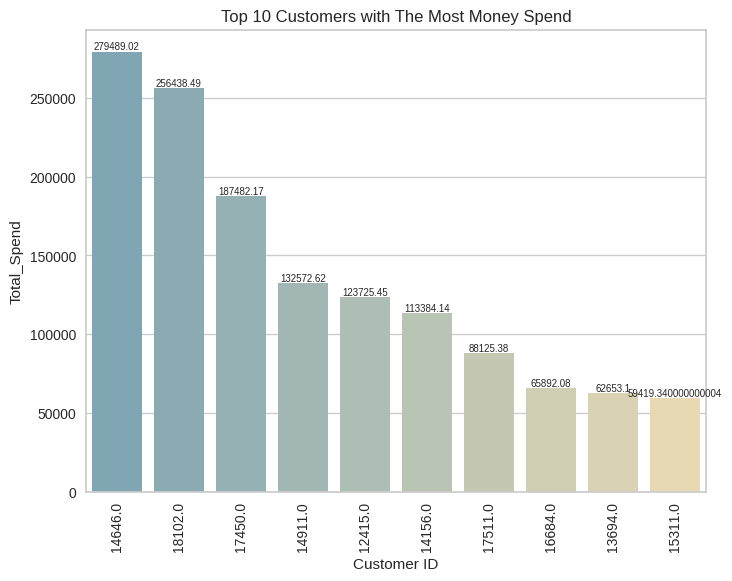

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
top10_customer['CustomerID'] = top10_customer['CustomerID'].astype(str)
ax= sns.barplot(data=top10_customer, x='CustomerID', y='Total_Spend', palette= "blend:#7AB,#EDA")
plt.xticks(rotation=90)
plt.xlabel("Customer ID")
plt.title("Top 10 Customers with The Most Money Spend")
# Adding value on each bar
for i, v in enumerate(top10_customer['Total_Spend']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

Kode di atas bertujuan untuk membuat visualisasi menggunakan Seaborn, yang akan menampilkan 10 pelanggan teratas berdasarkan total pengeluaran (Total_Spend). Visualisasi ini menggunakan plot batang untuk dengan jelas memperlihatkan perbandingan antara total pengeluaran dari setiap pelanggan.

Dengan demikian, keseluruhan kode berfungsi untuk membuat visualisasi yang jelas dan informatif dari 10 pelanggan teratas berdasarkan total pengeluaran. Visualisasi ini membantu dengan jelas memahami perbandingan antara pengeluaran dari pelanggan-pelanggan teratas dalam dataset yang sedang diproses.

pelanggan dicantumkan dengan customer id (sb-x) dan banyak nya pengeluaran pada (sb-y)

Negara dengan jumlah pembelanjaan tertinggi

# Data Cleaning and Visualization / Feature Engineering

In [ ]:
df.shape

(541909, 10)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,OrderValue,total_price
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,17.987795
std,218.081158,96.759853,1713.600303,378.810824,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000,168469.600000


In [ ]:
df = df[df['Quantity'] > 0] #filter quantity diatas 0, karena jumlah barang (quantity) tidak mungkin nol ataupun minus
df.describe()

,Quantity,UnitPrice,CustomerID,OrderValue,total_price
count,531285.000000,531285.000000,397924.000000,531285.00000,531285.00000
mean,10.655262,3.857296,15294.315171,20.03550,20.03550
std,156.830323,41.810047,1713.169877,270.91237,270.91237
min,1.000000,-11062.060000,12346.000000,-11062.06000,-11062.06000
25%,1.000000,1.250000,13969.000000,3.75000,3.75000
50%,3.000000,2.080000,15159.000000,9.90000,9.90000
75%,10.000000,4.130000,16795.000000,17.70000,17.70000
max,80995.000000,13541.330000,18287.000000,168469.60000,168469.60000


Dengan menggunakan kode tersebt bertujuan untuk melakukan filtering pada data untuk memastikan hanya data dengan jumlah barang yang valid yang dianalisis, dan kemudian mendapatkan ringkasan statistik dari data yang telah difilter tersebut. Hal ini penting dalam proses pengolahan data untuk memastikan keakuratan dan keandalan analisis yang akan dilakukan selanjutnya.

In [ ]:
print("Nilai dataframe jumlah baris dan kolom setelah difilter ialah : ", df.shape)
print("Nilai baris yg berkurang ialah sebanyak : ", len(data)-len(df), "baris yang difilter")

Nilai dataframe jumlah baris dan kolom setelah difilter ialah :  (531285, 10)
Nilai baris yg berkurang ialah sebanyak :  10624 baris yang difilter


In [ ]:
### Missing value checking
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,592
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133361
Country,0
OrderValue,0
total_price,0


Kode di atas bertujuan untuk melakukan pemeriksaan terhadap nilai-nilai yang hilang (missing values) dalam DataFrame df pada proyek analisis RFM.

Hasil dari kode tersebut adalah daftar jumlah nilai yang hilang dalam setiap kolom DataFrame df. Ini berguna untuk memberikan pemahaman tentang sejauh mana data mengandung nilai yang hilang, yang dapat mempengaruhi kualitas dan validitas analisis yang dilakukan. Dengan mengetahui di mana nilai yang hilang terdapat, Anda dapat membuat keputusan yang tepat dalam menangani nilai yang hilang tersebut, misalnya dengan mengisi nilai yang hilang atau dengan menghapus baris atau kolom yang mengandung nilai yang hilang.

terdapat missing value pada kolom Description sebanyak 592 dan pada kolom CustomerID juga terdapat missing value sebanyak 133361

### Customer ID missing sebanyak : 133361 dan Description sebanyak 592 data missingnya.

In [ ]:
df = df[df['UnitPrice'] > 0] #filter UnitPrice diatas 0, karena harga satuan barang tidak mungkin nol ataupun minus
df.describe()

,Quantity,UnitPrice,CustomerID,OrderValue,total_price
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871,20.121871
std,155.524124,35.915681,1713.141560,270.356743,270.356743
min,1.000000,0.001000,12346.000000,0.001000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000,168469.600000


Dengan menggunakan kode tersebut, memastikan bahwa hanya data dengan harga satuan barang yang valid yang dianalisis, dan kemudian mendapatkan ringkasan statistik dari data yang telah difilter tersebut. Langkah-langkah ini penting dalam proses pengolahan data untuk memastikan keakuratan dan keandalan analisis yang akan dilakukan selanjutnya.

informasi yang ditampilkan antara lain yaitu, count, mean (rata-rata), std (standar deviasi), min(nilai terkecil atau minimum), 25% (Q1 atau Quartile bawah), 50% (Q2 atau Quartile tengah biasa disebut dengan median), 75% (Q3 atau Quartile atas), dan max (nilai tertinggi maximum).

In [ ]:
print("Nilai dataframe jumlah baris dan kolom setelah difilter ialah : ", df.shape)
print("Nilai baris yg berkurang ialah sebanyak : ", len(data)-len(df), "baris yang difilter")

Nilai dataframe jumlah baris dan kolom setelah difilter ialah :  (530104, 10)
Nilai baris yg berkurang ialah sebanyak :  11805 baris yang difilter


In [ ]:
### Missing value checking
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132220
Country,0
OrderValue,0
total_price,0


In [ ]:
df.dropna(inplace=True)
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [ ]:
df = df[df['OrderValue'] > 0] #filter OrderValue diatas 0, karena jumlah nilai pesanan tidak mungkin nol ataupun minus
df.describe()

,Quantity,UnitPrice,CustomerID,OrderValue,total_price
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000,22.397000
std,179.331775,22.097877,1713.141560,309.071041,309.071041
min,1.000000,0.001000,12346.000000,0.001000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000,168469.600000


Setelah dimasukkan rumus 'C', nilai didalam df menjadi berubah karena sudah difilter

In [ ]:
print("Nilai dataframe jumlah baris dan kolom setelah difilter ialah : ", df.shape)
print("Nilai baris yg berkurang ialah sebanyak : ", len(data)-len(df), "baris yang difilter")

Nilai dataframe jumlah baris dan kolom setelah difilter ialah :  (397884, 10)
Nilai baris yg berkurang ialah sebanyak :  144025 baris yang difilter


In [ ]:
### Missing value checking
df.isna().sum()
# Customernya banyak kosong artinya tidak terdata (dibuang saja, karena sulit untuk mencari informasi data customernya)

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
OrderValue,0
total_price,0


In [ ]:
# Note that we have some missing values in column "CustomerID".
# Since our goal is to create a customer segmentation using the RFM framework, we need
# drop rows with missing customer ID and description.
# customer id dan deskripsi sifatnya unik, sehingga kita exclude nilai kosong.
# kalau kita imputasi dengan modus nilai customer id itu kurang, karena akan mempengaruhi transaksional.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
 8   OrderValue   397884 non-null  float64
 9   total_price  397884 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 33.4+ MB


### Penjelasan
terdapat missing value pada kolom description dan customerid
maka pada kedua kolom yang merupakan missing value tersebut dihapuskan.
karena kolom yang merupakan missing value tidak diperlukan pada DataFrame.

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,total_price
371065,569210,23322,LARGE WHITE HEART OF WICKER,5,10/2/2011 11:41,2.95,13681.0,United Kingdom,14.75,14.75
9286,537196,22430,ENAMEL WATERING CAN CREAM,1,12/5/2010 13:55,4.95,15426.0,United Kingdom,4.95,4.95
344784,567099,20829,GLITTER HANGING BUTTERFLY STRING,4,9/16/2011 13:31,2.10,15311.0,United Kingdom,8.40,8.40
266796,560271,82578,KITCHEN METAL SIGN,1,7/17/2011 14:51,0.55,16474.0,United Kingdom,0.55,0.55
513280,579542,23582,VINTAGE DOILY JUMBO BAG RED,10,11/30/2011 10:13,2.08,13658.0,United Kingdom,20.80,20.80


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34


**RFM**

In [ ]:
# Aggregate at customer level
import pandas as pd

# Pastikan DataFrame 'data' telah didefinisikan sebelumnya
# Anda juga harus memiliki kolom "CustomerID", "InvoiceDate", dan "OrderValue" dalam DataFrame 'data'.
customer_data = df.pivot_table(index="CustomerID",
                                 values=["InvoiceDate", "OrderValue"],
                                 aggfunc={"InvoiceDate": [min, max, pd.Series.nunique], "OrderValue": sum})
customer_data

<ipython-input-67-29ceb03fd68e>:6: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  customer_data = df.pivot_table(index="CustomerID",
<ipython-input-67-29ceb03fd68e>:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  customer_data = df.pivot_table(index="CustomerID",
<ipython-input-67-29ceb03fd68e>:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_data = df.pivot_table(index="CustomerID",


InvoiceDate                           OrderValue
                        max               min nunique        sum
CustomerID                                                      
12346.0     1/18/2011 10:01   1/18/2011 10:01       1   77183.60
12347.0       8/2/2011 8:48   1/26/2011 14:30       7    4310.00
12348.0     9/25/2011 13:13   1/25/2011 10:42       4    1797.24
12349.0     11/21/2011 9:51   11/21/2011 9:51       1    1757.55
12350.0      2/2/2011 16:01    2/2/2011 16:01       1     334.40
...                     ...               ...     ...        ...
18280.0       3/7/2011 9:52     3/7/2011 9:52       1     180.60
18281.0     6/12/2011 10:53   6/12/2011 10:53       1      80.82
18282.0      8/5/2011 13:35   12/2/2011 11:43       2     178.05
18283.0      9/5/2011 12:35   1/23/2011 14:58      16    2094.88
18287.0     5/22/2011 10:39  10/12/2011 10:23       3    1837.28

[4338 rows x 4 columns]

- index="CustomerID": Menentukan kolom "CustomerID" sebagai indeks (baris) dari tabel pivot. Setiap unik "CustomerID" akan menjadi baris dalam tabel.

- values=["InvoiceDate", "OrderValue"]: Menentukan kolom-kolom yang akan diambil nilai-nilainya dalam tabel pivot. Dalam hal ini, kita ingin melihat informasi terkait "InvoiceDate" dan "OrderValue" untuk setiap pelanggan.

- aggfunc={"InvoiceDate": [min, max, pd.Series.nunique], "OrderValue": sum}: Menentukan fungsi agregasi untuk setiap kolom nilai.
    - min: Menunjukkan tanggal transaksi terawal (InvoiceDate) untuk setiap pelanggan.
    - max: Menunjukkan tanggal transaksi terbaru (InvoiceDate) untuk setiap pelanggan.
    - pd.Series.nunique: Menghitung jumlah nilai unik (jumlah transaksi unik) dalam kolom "InvoiceDate" untuk setiap pelanggan.
    - sum: Menghitung total nilai dalam kolom "OrderValue" (total nilai pesanan) untuk setiap pelanggan.

### Penjelasan code
code data di atas bertujuan untuk mengumpulkan data di tingkat pelanggan untuk menyiapkan data yang diperlukan untuk analisis RFM. Hal ini akan membantu dalam memahami pola perilaku pelanggan berdasarkan aspek RFM, yaitu keterkinian (Recency), frekuensi (Frequency), nilai moneter (Monetary).

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (InvoiceDate, max)      4338 non-null   object 
 1   (InvoiceDate, min)      4338 non-null   object 
 2   (InvoiceDate, nunique)  4338 non-null   int64  
 3   (OrderValue, sum)       4338 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 169.5+ KB


### Penjelasan code

In [ ]:
#Rename Columns
customer_data.columns = ["LastInvoiceDate", "FirstInvoiceDate", "Frequency", "MonetaryValue"]
customer_data

,LastInvoiceDate,FirstInvoiceDate,Frequency,MonetaryValue
CustomerID,,,,
12346.0,1/18/2011 10:01,1/18/2011 10:01,1,77183.60
12347.0,8/2/2011 8:48,1/26/2011 14:30,7,4310.00
12348.0,9/25/2011 13:13,1/25/2011 10:42,4,1797.24
12349.0,11/21/2011 9:51,11/21/2011 9:51,1,1757.55
12350.0,2/2/2011 16:01,2/2/2011 16:01,1,334.40
...,...,...,...,...
18280.0,3/7/2011 9:52,3/7/2011 9:52,1,180.60
18281.0,6/12/2011 10:53,6/12/2011 10:53,1,80.82
18282.0,8/5/2011 13:35,12/2/2011 11:43,2,178.05


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LastInvoiceDate   4338 non-null   object 
 1   FirstInvoiceDate  4338 non-null   object 
 2   Frequency         4338 non-null   int64  
 3   MonetaryValue     4338 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 169.5+ KB


In [ ]:
#deskripsi tanggal
customer_data.LastInvoiceDate.describe()

,LastInvoiceDate
count,4338
unique,4224
top,9/25/2011 14:37
freq,3


In [ ]:
#deskripsi tanggal
customer_data.LastInvoiceDate.info()

<class 'pandas.core.series.Series'>
Index: 4338 entries, 12346.0 to 18287.0
Series name: LastInvoiceDate
Non-Null Count  Dtype 
--------------  ----- 
4338 non-null   object
dtypes: object(1)
memory usage: 67.8+ KB


## Recency
Dalam proyek analisis RFM, perhitungan terkait dengan skor RFM sering melibatkan perhitungan terhadap variabel-variabel seperti recency (keterkaitan waktu), relative recency (keterkaitan waktu relatif), dan relative frequency (frekuensi relatif).

Kode ini berguna dalam menentukan titik referensi terkini (tanggal terbaru) untuk digunakan dalam perhitungan recency dan relative recency. Dengan menggunakan nilai terbaru ini, dapat membandingkan waktu dari peristiwa terakhir dengan tanggal terbaru, yang penting dalam mengevaluasi keaktualan (recency) dari transaksi pelanggan. Dalam analisis RFM, konsep-konsep ini membantu dalam menentukan profil pelanggan yang berbeda berdasarkan perilaku transaksi mereka.

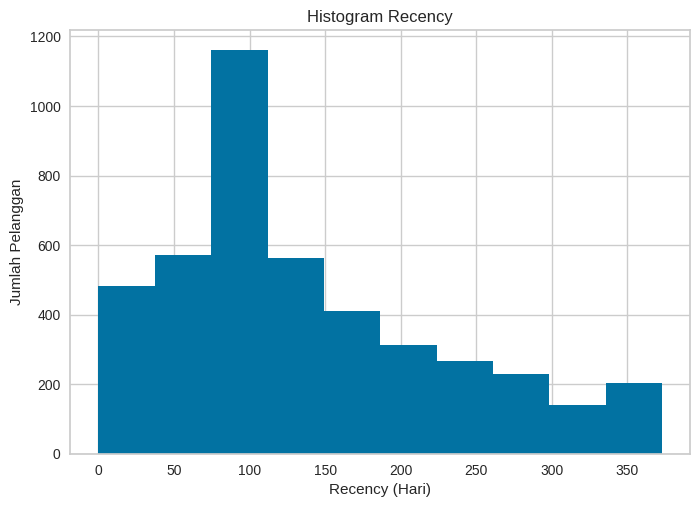

In [ ]:
# Year : Month : Date untuk today dan tanggal lainnya
import numpy as np
import matplotlib.pyplot as plt

# Pastikan Anda telah memiliki DataFrame 'customer_data' yang sesuai dari langkah sebelumnya

# Konversi kolom "LastInvoiceDate" ke tipe data datetime jika belum dalam format datetime
customer_data["LastInvoiceDate"] = pd.to_datetime(customer_data["LastInvoiceDate"])

# Misalnya, untuk mendefinisikan 'today' sebagai tanggal terakhir di dalam dataset kolom LastInvoiceDate ini:
import datetime
#today = datetime.datetime.now()
today = pd.to_datetime(customer_data["LastInvoiceDate"].max()) # acuan referensi tanggalnya

# Hitung recency: interval (hari) antara tanggal transaksi terakhir dan hari ini
customer_data["Recency"] = (today - customer_data["LastInvoiceDate"]) / np.timedelta64(1, 'D')

# Plot histogram recency
customer_data["Recency"].hist()
plt.title("Histogram Recency")
plt.xlabel("Recency (Hari)")
plt.ylabel("Jumlah Pelanggan")
plt.show()


In [ ]:
today

Timestamp('2011-12-09 12:16:00')

In [ ]:
customer_data["Recency"].describe()

,Recency
count,4338.000000
mean,138.629818
std,92.784676
min,0.000000
25%,74.949653
50%,108.861806
75%,195.386806
max,373.099306


## Penjelasan code n output
Kode di atas bertujuan untuk menghitung dan memvisualisasikan distribusi recency (keterkaitan waktu terakhir) dari pelanggan dalam proyek analisis RFM.

Dengan menggunakan kode ini, dapat menganalisis distribusi recency dari pelanggan dalam bentuk histogram, yang memungkinkan untuk memahami pola keterkaitan waktu terakhir dari transaksi pelanggan. Histogram ini membantu dalam mengidentifikasi sebaran data recency secara visual, yang penting dalam menentukan segmentasi pelanggan berdasarkan perilaku transaksi terkini.

## Monetary Value

In [ ]:
# Calculate the relative monetary value: monetary value / Customer lifetime
# Note: this is to normalise the fact that newer customers have lower lifetime and thus lower frequency
# by nature.
customer_data["MonetaryValue"].describe()

,MonetaryValue
count,4338.000000
mean,2054.266460
std,8989.230441
min,3.750000
25%,307.415000
50%,674.485000
75%,1661.740000
max,280206.020000


<Axes: >

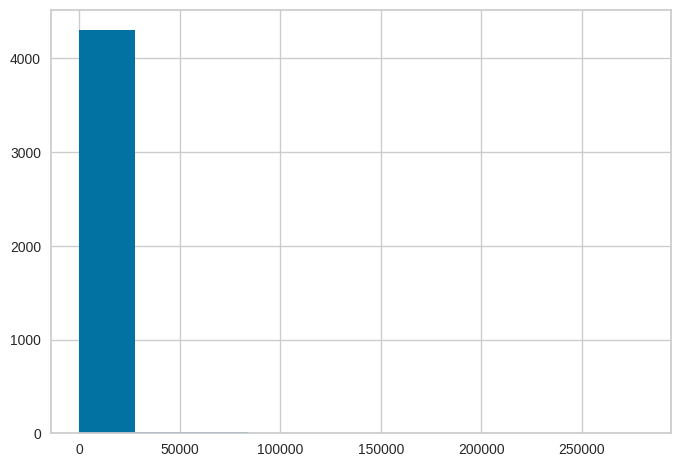

In [ ]:
customer_data["MonetaryValue"].hist()
# There are some outliers in terms of monetary value.

In [ ]:
np.percentile(customer_data["MonetaryValue"], 99)
# The 99.5% percentile of monetary value is 19.8k, i.e., 0.5% * 4K = 20 customers have value higher than 33.4K.
# We should exclude these outliers from our analysis.

19880.99570000001

In [ ]:
# Hitung persentil 99 dari MonetaryValue dan simpan kedalam percentile_99
percentile_99 = np.percentile(customer_data["MonetaryValue"], 99)

# Filter data yang memiliki MonetaryValue di bawah atau sama dengan persentil 99
customer_data = customer_data[customer_data["MonetaryValue"] <= percentile_99]

In [ ]:
customer_data["MonetaryValue"].describe()

,MonetaryValue
count,4294.000000
mean,1411.238783
std,2108.837909
min,3.750000
25%,305.867500
50%,663.730000
75%,1612.415000
max,19824.050000


In [ ]:
len(customer_data)

4294

In [ ]:
len(customer_data[customer_data["MonetaryValue"]<0])

0

In [ ]:
customer_data[customer_data["MonetaryValue"]<0].head()

,LastInvoiceDate,FirstInvoiceDate,Frequency,MonetaryValue,Recency
CustomerID,,,,,


### Penjelasan code dan output
Dengan membuat skor Monetary, untuk mengelompokkan nilai Monetary ke dalam beberapa kategori berdasarkan rentang nilai tertentu. Hal ini membantu dalam memahami pola pengeluaran pelanggan dan juga memfasilitasi proses segmentasi pelanggan berdasarkan pola pembelian mereka.

Text(0.5, 1.0, 'Jumlah Uang (MonetaryValue) yang dibelanjakan customer')

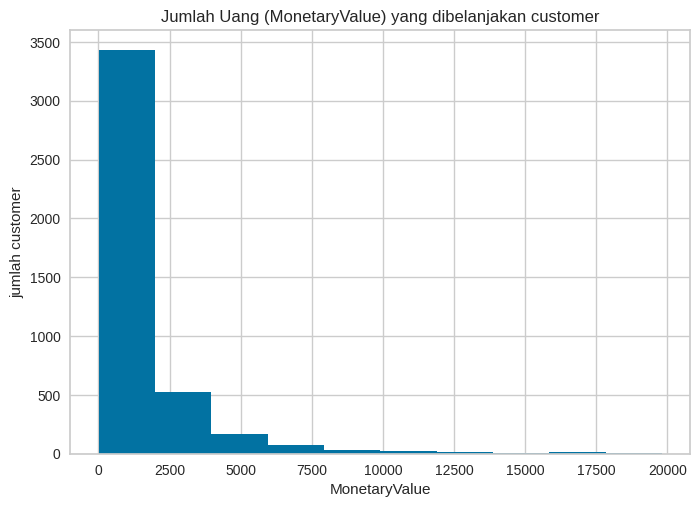

In [ ]:
customer_data["MonetaryValue"].hist()
plt.xlabel("MonetaryValue")
plt.ylabel("jumlah customer")
plt.title("Jumlah Uang (MonetaryValue) yang dibelanjakan customer")

Text(0.5, 1.0, 'Boxplot Jumlah MonetaryValue yang dibelanjakan customer')

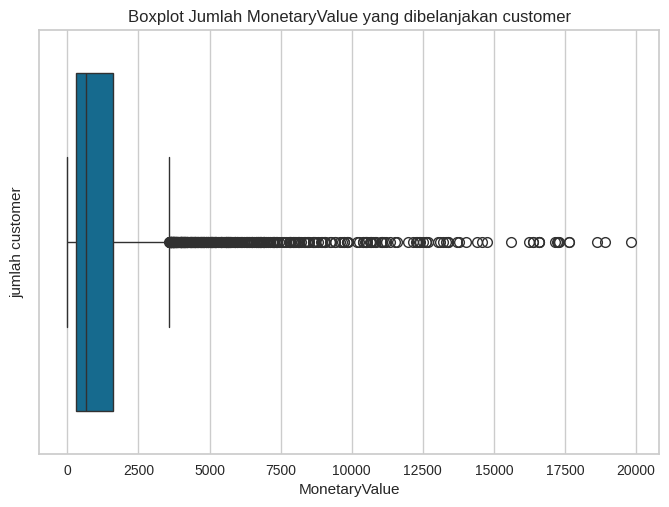

In [ ]:
sns.boxplot(data=customer_data,
            x='MonetaryValue')
plt.xlabel("MonetaryValue")
plt.ylabel("jumlah customer")
plt.title("Boxplot Jumlah MonetaryValue yang dibelanjakan customer")

## Frequency

### Frequency semakin ke kanan artinya percentilenya semakin tinggi

Makna dari grafik diatas ialah :
1. Semakin ke kanan sumbu x nya memiliki nilai frequency tertinggi, semakin kiri semakin kecil.
2. frequency yang kecil memiliki jumlah customer yang banyak

Text(0.5, 1.0, 'Boxplot Jumlah barang yang dibelanjakan customer')

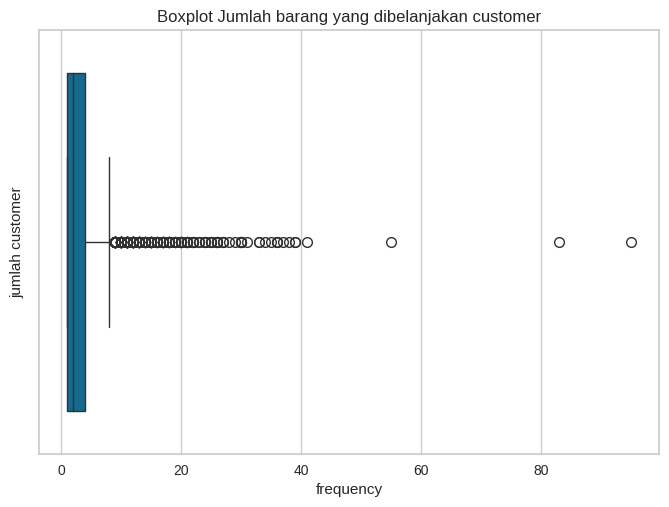

In [ ]:
sns.boxplot(data=customer_data,
            x='Frequency')
plt.xlabel("frequency")
plt.ylabel("jumlah customer")
plt.title("Boxplot Jumlah barang yang dibelanjakan customer")

In [ ]:
customer_data["Frequency"].describe()

,Frequency
count,4294.000000
mean,3.852585
std,4.853831
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,95.000000


Pertama, kita menggunakan fungsi pd.cut untuk membagi data MonetaryValue menjadi empat kelompok berdasarkan quartile data MonetaryValue. Quartile adalah nilai-nilai yang membagi data menjadi empat bagian dengan jumlah data yang serupa di setiap bagian. Pelanggan yang telah menghabiskan jumlah uang tertinggi diberi skor 4, sementara mereka yang menghabiskan jumlah uang terendah diberi skor 1. Skor Monetary Value ini mencerminkan seberapa besar kontribusi pelanggan terhadap pendapatan perusahaan.

In [ ]:
customer_data

,LastInvoiceDate,FirstInvoiceDate,Frequency,MonetaryValue,Recency
CustomerID,,,,,
12347.0,2011-08-02 08:48:00,1/26/2011 14:30,7,4310.00,129.144444
12348.0,2011-09-25 13:13:00,1/25/2011 10:42,4,1797.24,74.960417
12349.0,2011-11-21 09:51:00,11/21/2011 9:51,1,1757.55,18.100694
12350.0,2011-02-02 16:01:00,2/2/2011 16:01,1,334.40,309.843750
12352.0,2011-09-28 14:58:00,11/3/2011 14:37,8,2506.04,71.887500
...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,3/7/2011 9:52,1,180.60,277.100000
18281.0,2011-06-12 10:53:00,6/12/2011 10:53,1,80.82,180.057639
18282.0,2011-08-05 13:35:00,12/2/2011 11:43,2,178.05,125.945139


# Create RFM With K-Means without standarscaller

Outlier dibiarkan saja untuk kondisi modelling k-means, karena nilai monetary dan frequency memiliki makna yang wajar, jika frequency dan monetary bernilai sangat tinggi dan jumlah frequency nya tinggi hal ini menandakan ada customer yang 'kaya' secara ekonomi, tapi keumuman customer ialah pada frequency dan monetary yang tidak terlalu tinggi sehingga distribusi yang muncul menjadi skew kanan / skew positif (keberadaan outlier ada di sebelah kanan). Alasan ini menyatakan informasi dari kondisi ekonomi customer.

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer # Gunakan ini untuk PR atau boleh memakai KElbowVisualizer serta bisa dibandingkan hasilnya
# referensi : https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [ ]:
# hanya memilih kolom recency freq monetary dari dataframe customer_data
data_rfm = customer_data[['Recency','Frequency','MonetaryValue']]
data_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,129.144444,7,4310.00
12348.0,74.960417,4,1797.24
12349.0,18.100694,1,1757.55
12350.0,309.843750,1,334.40
12352.0,71.887500,8,2506.04
...,...,...,...
18280.0,277.100000,1,180.60
18281.0,180.057639,1,80.82
18282.0,125.945139,2,178.05


## Penjelasan kode dan output
Dalam kode di atas, dilakukan pemilihan kolom-kolom tertentu dari DataFrame customer_data untuk membentuk DataFrame baru yang disebut data_rfm. DataFrame baru ini terdiri dari tiga kolom, yaitu "Recency", "Frequency", dan "MonetaryValue".

DataFrame baru ini dapat digunakan untuk analisis lebih lanjut, seperti penghitungan skor RFM, pemodelan, atau visualisasi data yang memungkinkan untuk memahami lebih dalam pola transaksi dan perilaku pelanggan. Dengan fokus pada variabel Recency, Frequency, dan MonetaryValue, dapat mengidentifikasi pola pembelian, menilai loyalitas pelanggan, dan merencanakan strategi pemasaran yang sesuai.

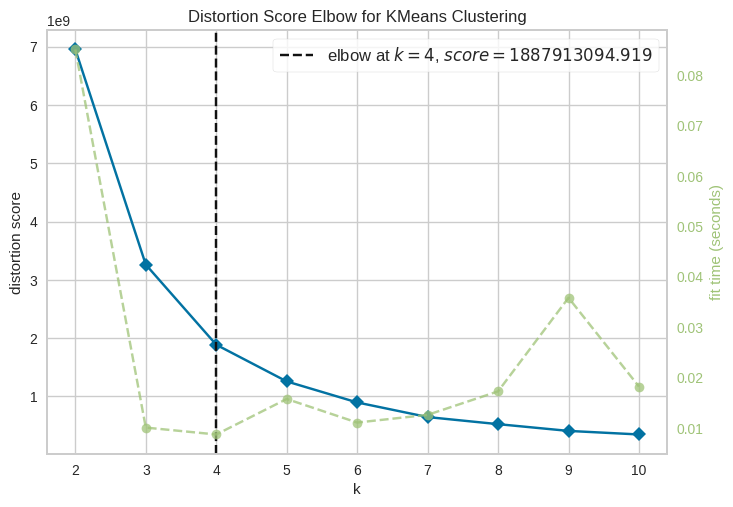

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_elbow = KElbowVisualizer(KMeans(random_state=1000), k=10)
model_elbow.fit(data_rfm)
model_elbow.show()

Hasil "score" diatas dalam output visualisasi elbow adalah nilai evaluasi yang mengukur sejauh mana data yang digunakan cocok dengan jumlah cluster yang dipilih. Tujuan visualisasi elbow adalah untuk menemukan titik di mana penurunan nilai "score" menurun secara signifikan dan membentuk pola seperti siku (elbow) pada grafik. Ini biasanya menunjukkan bahwa jumlah cluster yang dipilih adalah jumlah yang optimal untuk data yang digunakan. Semakin rendah nilai "score" ini, semakin baik model clusteringnya.

### Additional
Dalam pengelompokan data (clustering), kita sering menggunakan alat yang disebut KElbowVisualizer untuk membantu menentukan jumlah kluster yang optimal. Di sini, terdapat beberapa metrik yang dapat kita gunakan untuk mengukur seberapa baik model klastering bekerja.

1. Distortion (default): Mengukur jumlah jarak kuadrat antara setiap titik data dengan pusat kluster yang ditugaskan. Semakin rendah nilai distortion, semakin baik.

2. Silhouette Score: Menghitung koefisien Silhouette rata-rata dari semua sampel. Koefisien Silhouette berkisar dari -1 hingga 1, di mana nilai positif menunjukkan bahwa objek di dalam kluster lebih mirip satu sama lain daripada dengan kluster lain.

- Silhouette Score: Bayangkan Anda berada di sebuah pesta dan ingin tahu seberapa baik Anda berbaur dengan orang lain. Koefisien Silhouette menggambarkan seberapa cocok Anda dengan kelompok. Jika koefisien Silhouette Anda positif, itu artinya Anda lebih mirip dengan orang-orang di kelompok Anda daripada dengan orang-orang di kelompok lain. Semakin tinggi nilainya, semakin baik Anda berbaur dalam kelompok tersebut.

3. Calinski-Harabasz Score: Menghitung rasio dispersi antara dan dalam kluster. Semakin tinggi nilai Calinski-Harabasz, semakin baik, karena menunjukkan bahwa kluster memiliki batasan yang baik dan terpisah.
- Analogi: Pikirkan tentang berbagai kelompok warna di atas meja. Calinski-Harabasz Score mencoba mengukur seberapa jauh antara kelompok warna dan seberapa dekat warna dalam satu kelompok.
- Interpretasi: Jika nilai Calinski-Harabasz Score tinggi, itu berarti kelompok warna berbeda sangat terpisah satu sama lain dan warna dalam kelompok memiliki kesamaan yang baik. Jadi, semakin tinggi nilai Calinski-Harabasz Score, semakin baik kluster tersebut dalam hal pemisahan kelompok dan kesamaan warna suatu kelompok, semakin berbeda warnanya maka saling terpisah satu sama lain.

Dengan analogi ini, kita dapat membayangkan bahwa Silhouette Score fokus pada seberapa mirip objek dalam kluster, sedangkan Calinski-Harabasz Score melihat seberapa baik kluster dipisahkan dan memiliki karakteristik yang berbeda

Silhouette Score mengukur seberapa baik objek di dalam kluster mirip satu sama lain, sementara Calinski-Harabasz Score mengukur seberapa baik kluster terpisah satu sama lain.

## Penjelasan kode dan output
Kode di atas bertujuan untuk mengidentifikasi jumlah optimal dari kelompok (clusters) yang ada dalam data menggunakan metode KMeans dan memvisualisasikan hasilnya menggunakan visualisasi elbow

Dengan menggunakan metode elbow, dapat menentukan jumlah kelompok yang optimal untuk kelompok data Anda, yang kemudian dapat digunakan untuk analisis lebih lanjut, segmentasi pelanggan, atau pengembangan strategi pemasaran yang lebih efektif.

In [ ]:
kmeans_model = KMeans(
    n_clusters = 4, #4 dari evaluasi via score diatas
    random_state=42
)

kmeans_model.fit(data_rfm) #k-means dilatih kedalam data rfm diatas

KMeans(n_clusters=4, random_state=42)

## Penjelasan kode dan output
Dalam kode di atas, menggunakan model KMeans untuk mengelompokkan data dalam empat kelompok (clusters) berbeda

Dengan menggunakan model KMeans, dapat mengelompokkan data pelanggan ke dalam empat kelompok berbeda berdasarkan pola pembelian mereka. Informasi ini akan membantu Anda memahami perilaku dan preferensi pelanggan secara lebih mendalam, yang dapat digunakan untuk merancang strategi pemasaran yang lebih efektif dan personal.

n_clusters = 4 untuk menandakan bahwa ingin membagi data menjadi empat kelompok yang berbeda. Nilai random_state=42 digunakan untuk menginisialisasi generator bilangan acak, yang memastikan bahwa hasil yang dihasilkan dapat direproduksi.

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['cluster_elbow'] = kmeans_model.labels_
data_rfm

<ipython-input-93-326bddf7b6da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['cluster_elbow'] = kmeans_model.labels_


,Recency,Frequency,MonetaryValue,cluster_elbow
CustomerID,,,,
12347.0,129.144444,7,4310.00,1
12348.0,74.960417,4,1797.24,2
12349.0,18.100694,1,1757.55,2
12350.0,309.843750,1,334.40,0
12352.0,71.887500,8,2506.04,2
...,...,...,...,...
18280.0,277.100000,1,180.60,0
18281.0,180.057639,1,80.82,0
18282.0,125.945139,2,178.05,0


## Penjelasan kode dan output
Dalam kode di atas, untuk menetapkan label kluster yang dihasilkan oleh model KMeans ke setiap baris data dalam DataFrame data_rfm dengan menambahkan kolom baru bernama 'cluster_elbow'.

Dengan menetapkan label kluster ke setiap baris data, dapat melihat bagaimana pengelompokan pelanggan dilakukan berdasarkan pola pembelian dan perilaku yang telah diidentifikasi sebelumnya. Ini membantu dalam memahami bagaimana pelanggan terbagi ke dalam kelompok-kelompok yang berbeda dan dalam mengidentifikasi karakteristik yang mungkin dimiliki oleh setiap kelompok pelanggan.

<ipython-input-94-54d7facd106c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


Text(0.5, 1.0, 'Total Customer for Each Segment')

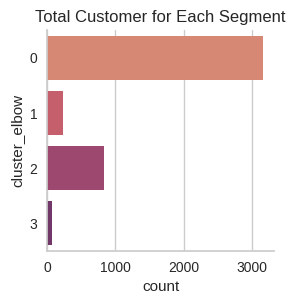

In [ ]:
sns.catplot(
    y = 'cluster_elbow',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

## penjelasan kode dan output
Dalam di atas, Anda menggunakan seaborn untuk membuat plot kategorikal yang menampilkan jumlah pelanggan dalam setiap segmen kluster yang telah ditetapkan sebelumnya.

Dengan menggunakan plot ini, dapat melihat distribusi jumlah pelanggan di setiap segmen kluster yang telah ditetapkan sebelumnya. Informasi ini membantu untuk memahami sebaran pelanggan dalam setiap segmen dan dapat memberikan wawasan penting tentang karakteristik yang mungkin dimiliki oleh setiap kelompok pelanggan.

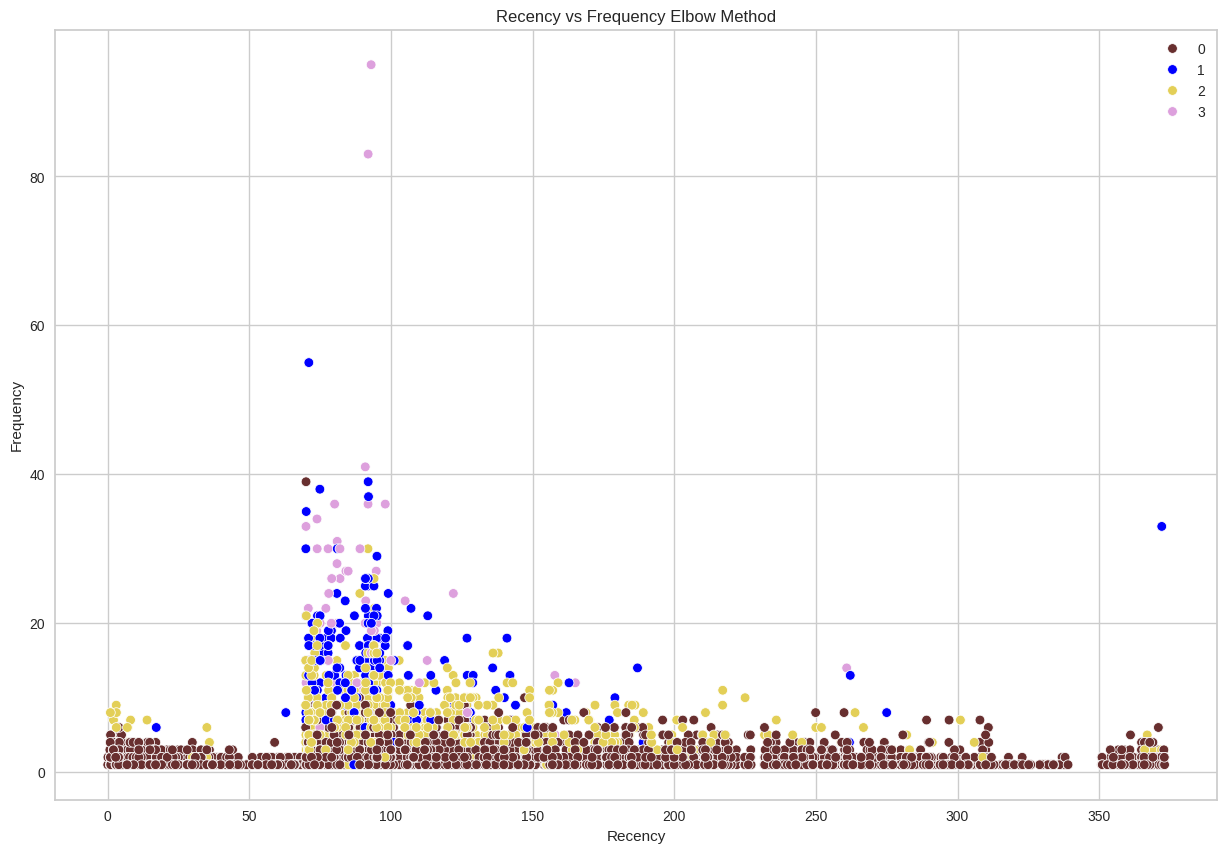

In [ ]:
#Recency VS Frequency
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["cluster_elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

### Interpretasi recency vs frequency :
1. Untuk cluster 0 memiliki frequency yang paling sedikit, tapi recency ada pada setiap rentang nilai.
2. Namun untuk cluster yang lain kurang terlihat perbedaan antar clusternya.

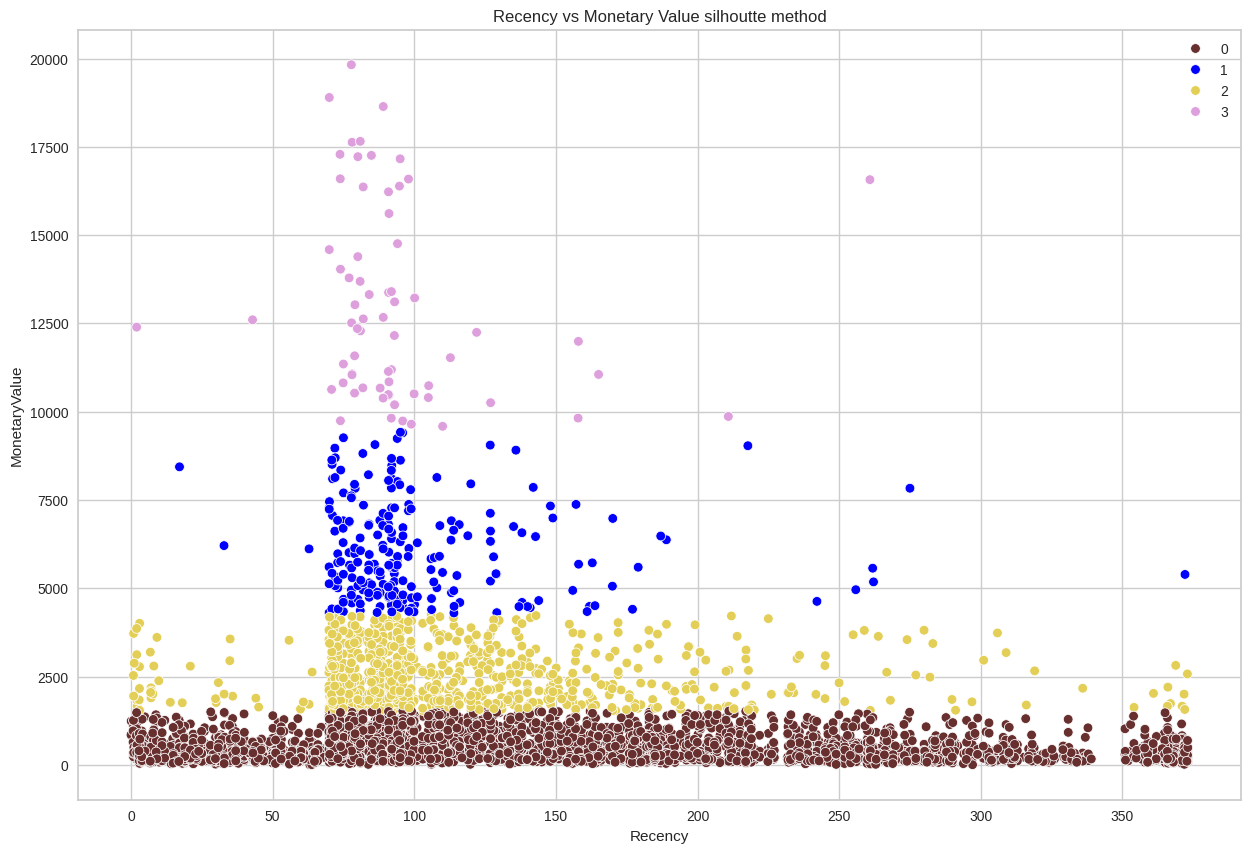

In [ ]:
#Recency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Recency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

### Makna grafik K-means, frequency dengan monetary diatas
1. Cluster 0 : memiliki rentang recency dari 0 hingga 350 hari, dan monetary nya dibawah nilai sekitar 1500
2. Cluster 1 : distribusi nilai recency berkumpul nilainya banyak pada rentang 75 hingga 150, kemudian untuk rentang monetary nya ada pada rentang 4000 hingga sekitar 10000
3. Cluster 2 : memiliki rentang recency dari 0 hingga 350 hari tapi secara distribusi banyak berkumpul pada rentang 75 hingga 250, dengan kondisi monetary diatas 1500 hingga sekitar dibawah 5000
4. Cluster 3 : Distribusi nilai recency berkumpul pada rentang nilai 75 hingga 100 dan monetary nya diatas 10000

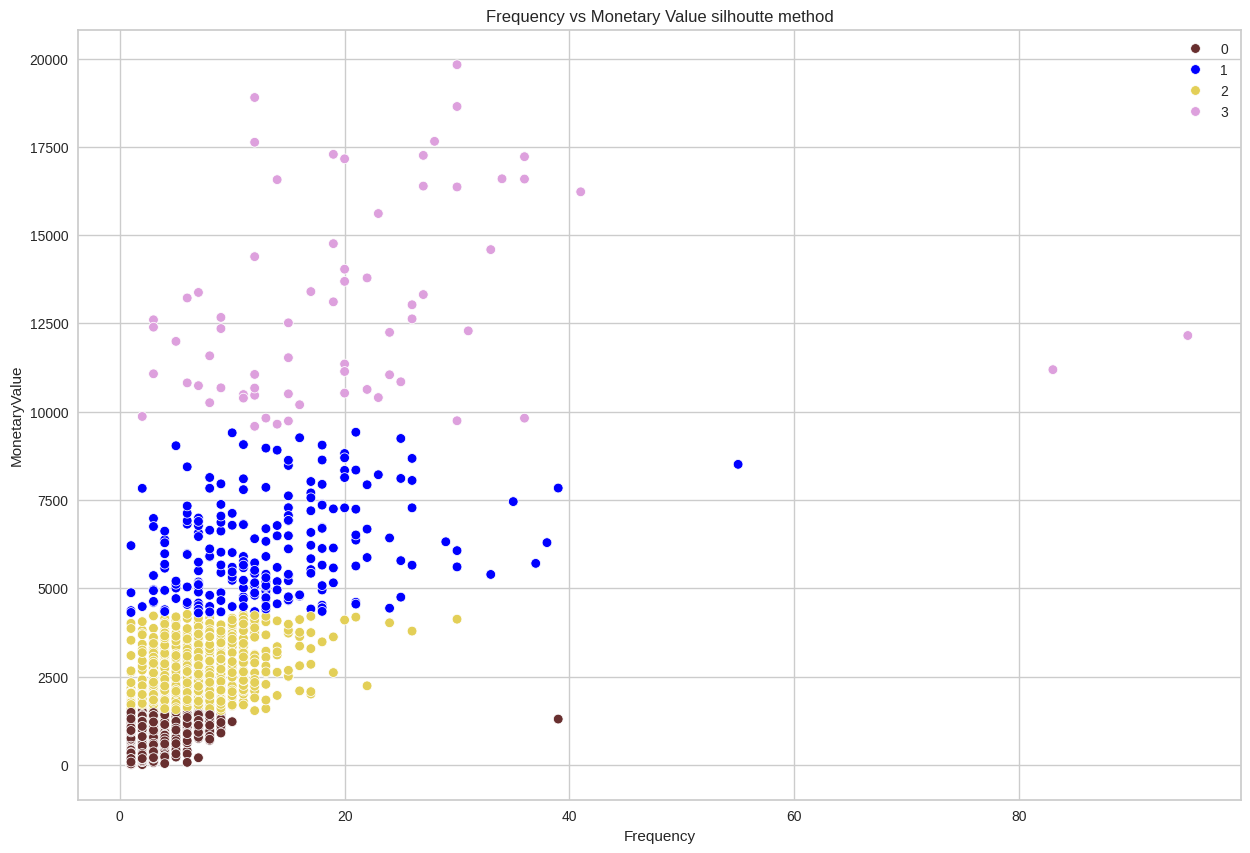

In [ ]:
#Frequency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Frequency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

### Makna grafik K-means, frequency dengan monetary diatas
1. Cluster 0 : frequency dibawah sekitar 15, dan juga monetary dibawah 2000
2. Cluster 1 : frequency dibawah sekitar 30 tapi monetary pada rentang 5000 hingga 10000
3. Cluster 2 : frequency dibawah 20 dan monetary sekitar diatas 2000 hingga sekitar dibawah 5000
4. Cluster 3 : frequency ada pada sebaran dibawah 40 dan juga monetary diatas 10000

### Penjelasan secara statistik

In [ ]:
# Cluster 0
df_cluster0 = data_rfm[data_rfm['cluster_elbow']==0]
# Pemisahan cluster 1,2,3
df_cluster1 = data_rfm[data_rfm['cluster_elbow']==1]
df_cluster2 = data_rfm[data_rfm['cluster_elbow']==2]
df_cluster3 = data_rfm[data_rfm['cluster_elbow']==3]

In [ ]:
df_cluster0.head()

,Recency,Frequency,MonetaryValue,cluster_elbow
CustomerID,,,,
12350.0,309.843750,1,334.40,0
12353.0,203.770139,1,89.00,0
12354.0,231.961806,1,1079.40,0
12355.0,213.935417,1,459.40,0
12358.0,150.091667,2,1168.06,0


In [ ]:
# List semua dataframes
clusters = [df_cluster0, df_cluster1, df_cluster2, df_cluster3]

# Kolom yang ingin ditampilkan
selected_columns = ['Recency', 'Frequency', 'MonetaryValue']

# Loop untuk menampilkan describe() dari kolom yang dipilih untuk setiap dataframe
for idx, cluster_df in enumerate(clusters):
    print(f"Describe Cluster {idx} for Selected Columns:")
    print(cluster_df[selected_columns].describe())
    print("\n")

Describe Cluster 0 for Selected Columns:
           Recency    Frequency  MonetaryValue
count  3163.000000  3163.000000    3163.000000
mean    148.922594     2.144167     542.622777
std     101.587755     1.615886     380.918008
min       0.000000     1.000000       3.750000
25%      71.905208     1.000000     230.235000
50%     126.870139     2.000000     429.840000
75%     219.080903     3.000000     779.735000
max     373.099306    39.000000    1530.360000


Describe Cluster 1 for Selected Columns:
          Recency   Frequency  MonetaryValue
count  227.000000  227.000000     227.000000
mean   102.307737   13.162996    6037.882467
std     40.414163    7.627665    1350.843792
min     17.124306    1.000000    4301.220000
25%     80.070139    7.500000    4906.640000
50%     91.975694   12.000000    5683.150000
75%    107.994444   17.000000    6911.720000
max    372.105556   55.000000    9418.470000


Describe Cluster 2 for Selected Columns:
          Recency   Frequency  MonetaryValue


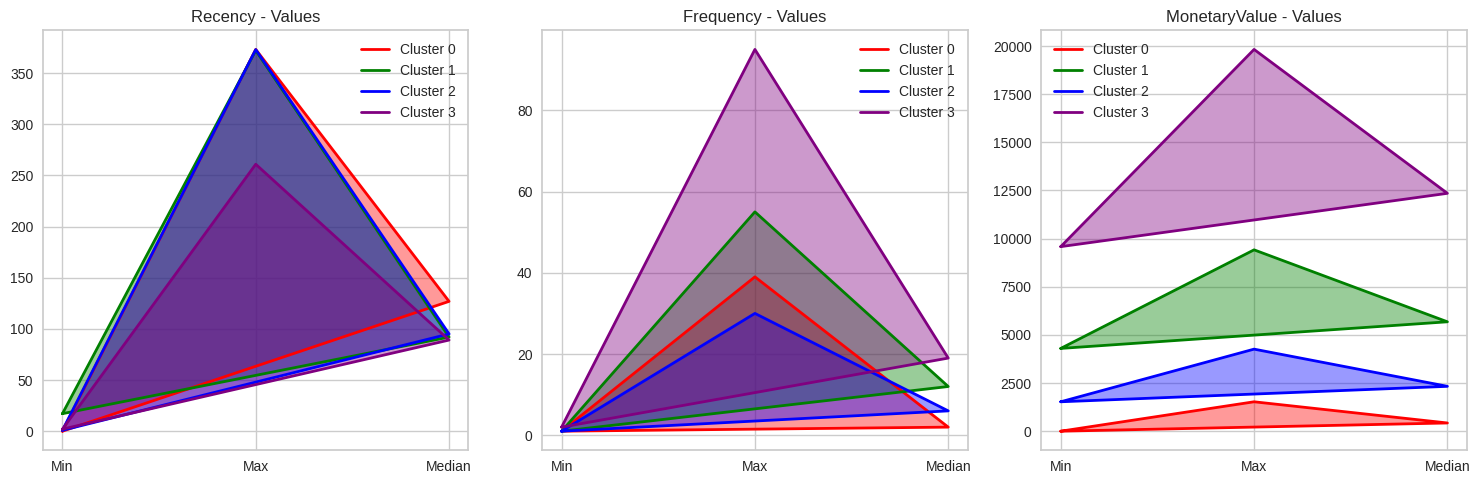

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat radar plot
def radar_plot(ax, values, categories, title, cluster_label, color):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Plot the values
    values += values[:1]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_label}', linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, alpha=0.4, color=color)

    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title)
    ax.legend()

# Plot radar plot untuk nilai min, max, median dari setiap kluster
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Warna yang berbeda untuk setiap kluster
colors = ['red', 'green', 'blue', 'purple']

for col_idx, column in enumerate(selected_columns):
    for cluster_idx, cluster_df in enumerate(clusters):
        values = [cluster_df[column].min(), cluster_df[column].max(), cluster_df[column].median()]
        radar_plot(axs[col_idx], values, ['Min', 'Max', 'Median'], f'{column} - Values', cluster_idx, color=colors[cluster_idx])

plt.tight_layout()
plt.show()